In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

rootFolder = '/home/fernando/S1_netpyne/sim/'
# rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('cell_data/')
folder = sorted(folder)

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/S1_netpyne/sim/


In [4]:
!nrnivmodl mod

/home/fernando/S1_netpyne/sim
Mod files: "mod/ar_traub.mod" "mod/cadad.mod" "mod/CaDynamics_E2.mod" "mod/cadyn.mod" "mod/cagk.mod" "mod/Ca_HVA.mod" "mod/cal_mh.mod" "mod/cal_mig.mod" "mod/Ca_LVAst.mod" "mod/Ca.mod" "mod/cancr.mod" "mod/canin.mod" "mod/can_mig.mod" "mod/catcb.mod" "mod/cat_mig.mod" "mod/cat_traub.mod" "mod/ch_CavL.mod" "mod/ch_CavN.mod" "mod/ch_KCaS.mod" "mod/ch_Kdrfastngf.mod" "mod/ch_KvAngf.mod" "mod/ch_KvCaB.mod" "mod/ch_leak.mod" "mod/ch_Navngf.mod" "mod/DetAMPANMDA.mod" "mod/DetGABAAB.mod" "mod/gabab.mod" "mod/h_BS.mod" "mod/HCN1.mod" "mod/HH2.mod" "mod/h_harnett.mod" "mod/hin.mod" "mod/h_kole.mod" "mod/h_migliore.mod" "mod/htc.mod" "mod/ican_sidi.mod" "mod/iccr.mod" "mod/IC.mod" "mod/iconc_Ca.mod" "mod/Ih.mod" "mod/ikscr.mod" "mod/IKsin.mod" "mod/Im.mod" "mod/IT2.mod" "mod/IT.mod" "mod/kap_BS.mod" "mod/kapcb.mod" "mod/kapin.mod" "mod/kBK.mod" "mod/kca.mod" "mod/kctin.mod" "mod/kdmc_BS.mod" "mod/kdr_BS.mod" "mod/kdrcr.mod" "mod/kdrin.mod" "mod/KdShu2007.mod" "mod/k

In [5]:
folder[760:770]

['L5_TTPC1_cADpyr232_1',
 'L5_TTPC1_cADpyr232_2',
 'L5_TTPC1_cADpyr232_3',
 'L5_TTPC1_cADpyr232_4',
 'L5_TTPC1_cADpyr232_5',
 'L5_TTPC2_cADpyr232_1',
 'L5_TTPC2_cADpyr232_2',
 'L5_TTPC2_cADpyr232_3',
 'L5_TTPC2_cADpyr232_4',
 'L5_TTPC2_cADpyr232_5']

In [6]:
def loadTemplateName(cellnumber):     
    f = open(outFolder+'/template.hoc', 'r')
    for line in f.readlines():
        if 'begintemplate' in line:
            templatename = str(line)     
    templatename=templatename[:-1]        
    templatename=templatename[14:]
    return templatename

In [7]:
cellnumber = 760 
cellName = folder[cellnumber]
outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
cellTemplateName = loadTemplateName(cellnumber)
print ("CellNumber = %d" % cellnumber)
print ("CellName = %s" % cellName)
print ("TemplateName = %s" % cellTemplateName)

with open(outFolder + '/current_amps.dat') as current_file:
    current_content = current_file.read()

holding_current, step1_current, step2_current, step3_current = [float(x) for x in current_content.split()]
print ('load step1_current from current_amps.dat = %s' % step1_current)

CellNumber = 760
CellName = L5_TTPC1_cADpyr232_1
TemplateName = cADpyr232_L5_TTPC1_0fb1ca4724
load step1_current from current_amps.dat = 0.55425


In [8]:
os.chdir(rootFolder)
from netpyne import sim
from netpyne import specs
import pickle

cfg = specs.SimConfig()     

cfg.duration = 1200 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 1234, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -65}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.5

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

allpops = ['L5_TTPC']

cfg.recordCells = allpops  # which cells to record from
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                     'V_apic_1': {'sec':'apic_1', 'loc':0.5, 'var':'v'},
                     'V_apic_3': {'sec':'apic_3', 'loc':0.5, 'var':'v'},
                     'V_apic_5': {'sec':'apic_5', 'loc':0.5, 'var':'v'},
                    'V_apic_17': {'sec':'apic_17', 'loc':0.5, 'var':'v'},
                    'V_apic_18': {'sec':'apic_18', 'loc':0.5, 'var':'v'},
                    'V_apic_30': {'sec':'apic_30', 'loc':0.5, 'var':'v'},
                    'V_apic_34': {'sec':'apic_34', 'loc':0.5, 'var':'v'},
                    'V_apic_36': {'sec':'apic_36', 'loc':0.5, 'var':'v'},
                    'V_apic_38': {'sec':'apic_38', 'loc':0.5, 'var':'v'},
                    'V_apic_40': {'sec':'apic_40', 'loc':0.5, 'var':'v'},
                    'V_apic_52': {'sec':'apic_52', 'loc':0.5, 'var':'v'},
                    'V_apic_54': {'sec':'apic_54', 'loc':0.5, 'var':'v'},
                    'V_apic_64': {'sec':'apic_64', 'loc':0.5, 'var':'v'},
                    'V_apic_66': {'sec':'apic_66', 'loc':0.5, 'var':'v'},
                    'V_apic_98': {'sec':'apic_98', 'loc':0.5, 'var':'v'},
                    'V_apic_99': {'sec':'apic_99', 'loc':0.5, 'var':'v'},
                    'V_apic_100': {'sec':'apic_100', 'loc':0.5, 'var':'v'}}

## Dict with traces to record
cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.025            

cfg.simLabel = 'S1_L5_TTPC'
cfg.saveFolder = '.'
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simConfig', 'netParams'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			##  
cfg.saveCellConns = False		##  


#------------------------------------------------------------------------------
# Current inputs 
#------------------------------------------------------------------------------
cfg.addIClamp = 1

cfg.IClamp1 = {'pop': 'L5_TTPC', 'sec': 'soma_0', 'loc': 0.5, 'start': 500, 'dur': 25, 'amp': step1_current}
cfg.IClamp2 = {'pop': 'L5_TTPC', 'sec': 'apic_98', 'loc': 0.5, 'start': 700, 'dur': 25, 'amp': step1_current}
cfg.IClamp3 = {'pop': 'L5_TTPC', 'sec': 'apic_99', 'loc': 0.5, 'start': 900, 'dur': 25, 'amp': step1_current}
cfg.IClamp4 = {'pop': 'L5_TTPC', 'sec': 'apic_100', 'loc': 0.5, 'start': 1100, 'dur': 25, 'amp': step1_current}


netParams = specs.NetParams()   # object of class NetParams to store the network parameters

#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------
#StochKv_deterministic.mod
cellName = folder[cellnumber]
cellTemplateName = loadTemplateName(cellnumber)
cellRule = netParams.importCellParams(label=cellName + '_rule', somaAtOrigin=False,
    conds={'cellType': cellName, 'cellModel': 'HH_full'},
    fileName='cellwrapper3.py',
    cellName='loadCell',
    cellInstance = True,
    cellArgs={'cellName': cellName, 'cellTemplateName': cellTemplateName})

#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------
netParams.popParams['L5_TTPC'] = {'cellType': cellName, 'cellModel': 'HH_full', 'numCells': 1} 

#------------------------------------------------------------------------------
# Current inputs (IClamp)
#------------------------------------------------------------------------------
if cfg.addIClamp:
     for key in [k for k in dir(cfg) if k.startswith('IClamp')]:
        params = getattr(cfg, key, None)
        [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

        #cfg.analysis['plotTraces']['include'].append((pop,0))  # record that pop

        # add stim source
        netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

        # connect stim source to target
        netParams.stimTargetParams[key+'_'+pop] =  {
            'source': key, 
            'conds': {'pop': pop},
            'sec': sec, 
            'loc': loc}

sim.createSimulateAnalyze(netParams, cfg)     

	1 
	1 
	1 
cADpyr232_L5_TTPC1_0fb1ca4724[0]

Start time:  2022-06-08 15:11:00.868465

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 1 
  Done; cell creation time = 0.06 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 4 
  Done; cell stims creation time = 0.00 s.
Recording 20 traces of 20 types on node 0
0.0s

Running simulation using NEURON for 1200.0 ms...
0.5s
1.0s
  Done; run time = 6.35 s; real-time ratio: 0.19.

Gathering data...
  Done; gather time = 0.05 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 1 (0.83 Hz)
  Simulated time: 1.2 s; 1 workers
  Run time: 6.35 s
   L5_TTPC : 0.833 Hz
  Done; plotting time = 0.00 s

Total time = 6.47 s


In [9]:
netpyneTraces = []
netpyneTracesList = []
for vname in ['V_soma', 'V_apic_0','V_apic_1','V_apic_3','V_apic_5','V_apic_17','V_apic_18','V_apic_30','V_apic_34','V_apic_36','V_apic_38','V_apic_40','V_apic_52','V_apic_54','V_apic_64','V_apic_66','V_apic_98','V_apic_99','V_apic_100']:
        netpyneTraces.append(np.array(sim.simData[vname]['cell_0']))
        netpyneTracesList.append(list(sim.simData[vname]['cell_0']))   

In [1]:
# plot both traces overlayed
fontsiz=16
timeRange = [0, 1200]
recordStep = 0.025
figSize = (8,2.5)
fig = plt.figure(figsize=figSize)  # Open a new figure

# fig.suptitle('%s' % (cellName), fontsize=14)

alphalist = [1.0, 0.5, 0.45, 0.45, 0.4, 0.4, 0.4, 0.30, 0.30, 0.25, 0.25]

t = np.arange(timeRange[0], timeRange[1]+recordStep, recordStep) 
cnumber = 0  
for c,vname in enumerate(['V_soma', 'V_apic_0','V_apic_1','V_apic_3','V_apic_5','V_apic_17','V_apic_18','V_apic_30','V_apic_34','V_apic_36','V_apic_38','V_apic_40','V_apic_52','V_apic_54','V_apic_64','V_apic_66','V_apic_98','V_apic_99','V_apic_100']):
#     plt.subplot(3,1,1)
    netpyneTrace = netpyneTraces[c]
    plt.ylabel('V (mV)', fontsize=fontsiz)
    if vname in ['V_soma', 'V_apic_0','V_apic_1','V_apic_3','V_apic_5','V_apic_17','V_apic_18','V_apic_30','V_apic_52','V_apic_66','V_apic_98']:
        plt.plot(t[:len(netpyneTrace)], netpyneTrace, color='black', linewidth=2.5, label=vname, alpha=alphalist[cnumber])    #
        cnumber+=1
    plt.xlim(517, 527)
    plt.ylim(-70,35)
    plt.grid(False)
#     plt.xticks([0,1000,2000,3000],fontsize=12)
#     plt.yticks([-80,-40,0,40], fontsize=12)
    plt.xticks([517,519,521,523,525,527],[0,2,4,6,8,10],fontsize=12);
    plt.yticks(fontsize=12);
#     plt.legend(fontsize=10.5, loc='upper right', bbox_to_anchor=(1.0, 1.01))

plt.xlabel('Time (ms)', fontsize=fontsiz)
plt.ion()
plt.tight_layout()
os.chdir(rootFolder)
os.chdir('../info/')
plt.savefig('trace_%s.png' % cellName, facecolor = 'white' , dpi=300)
print ("Figure Saved in %s/comparison_traces_soma_voltage_4steps_%s.png" % (rootFolder,cellName))
print ("https://bbp.epfl.ch/nmc-portal/microcircuit.html#/metype/%s/details" % cellName[:-5])
plt.show()

NameError: name 'plt' is not defined

In [10]:
for section in netParams.cellParams['L5_TTPC1_cADpyr232_1_rule']['secLists']['apical']:
    print(section,'->',netParams.cellParams['L5_TTPC1_cADpyr232_1_rule']['secs'][section]['topol']['parentSec'])

apic_0 -> soma_0
apic_1 -> apic_0
apic_2 -> apic_1
apic_3 -> apic_1
apic_4 -> apic_3
apic_5 -> apic_3
apic_6 -> apic_5
apic_7 -> apic_6
apic_8 -> apic_7
apic_9 -> apic_8
apic_10 -> apic_8
apic_11 -> apic_7
apic_12 -> apic_6
apic_13 -> apic_12
apic_14 -> apic_12
apic_15 -> apic_14
apic_16 -> apic_14
apic_17 -> apic_5
apic_18 -> apic_17
apic_19 -> apic_18
apic_20 -> apic_19
apic_21 -> apic_20
apic_22 -> apic_21
apic_23 -> apic_21
apic_24 -> apic_20
apic_25 -> apic_24
apic_26 -> apic_24
apic_27 -> apic_19
apic_28 -> apic_27
apic_29 -> apic_27
apic_30 -> apic_18
apic_31 -> apic_30
apic_32 -> apic_31
apic_33 -> apic_31
apic_34 -> apic_30
apic_35 -> apic_34
apic_36 -> apic_34
apic_37 -> apic_36
apic_38 -> apic_36
apic_39 -> apic_38
apic_40 -> apic_38
apic_41 -> apic_40
apic_42 -> apic_41
apic_43 -> apic_42
apic_44 -> apic_43
apic_45 -> apic_43
apic_46 -> apic_42
apic_47 -> apic_41
apic_48 -> apic_47
apic_49 -> apic_48
apic_50 -> apic_48
apic_51 -> apic_47
apic_52 -> apic_40
apic_53 -> apic_5

In [11]:
0,1,3,5,17,18,30,34,36,38,40,52,54,64,66,98,99,100

(0, 1, 3, 5, 17, 18, 30, 34, 36, 38, 40, 52, 54, 64, 66, 98, 99, 100)

In [12]:
netParams.cellParams['L5_TTPC1_cADpyr232_1_rule']['secs']['dend_0']['topol']['parentSec']

'soma_0'

In [13]:
netParams.cellParams['L5_TTPC1_cADpyr232_1_rule']['secs']['soma_0']['topol']

{_repr_mimebundle_: {}}

Plotting 3D cell shape ...
  There was an exception in plotShape(): 
    argument of type 'bool' is not iterable 
    (<class 'TypeError'>, TypeError("argument of type 'bool' is not iterable"), <traceback object at 0x7f153eed8d80>)


-1

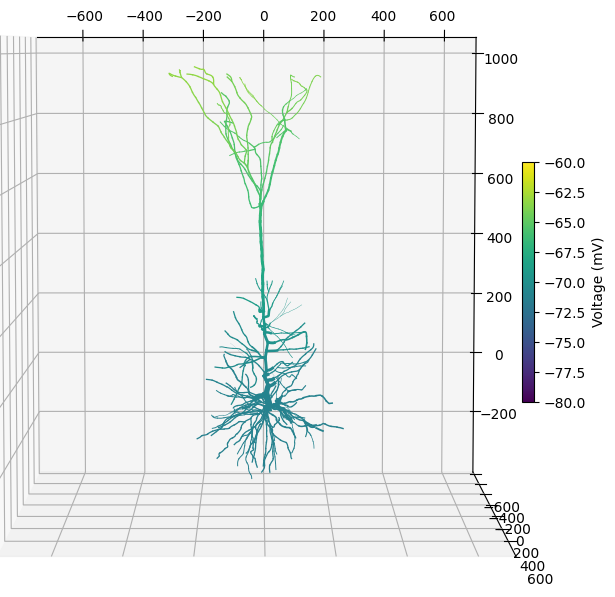

In [52]:
sim.analysis.plotShape(includePre=['L5_TTPC'], includePost=['L5_TTPC'], includeAxon=False, showSyns=False, showElectrodes=True,
    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-80, -60], showFig=1, synSize=2)

In [15]:
# cfg.duration = 522 ## Duration of the sim, in ms  
# sim.createSimulateAnalyze(netParams, cfg)   

In [ ]:
#E2 -> syn 123
netParams.synMechParams['L5_TTPC:L5_TTPC'] = {'mod': 'DetAMPANMDA',
                                          'Dep': 671.0,
                                          'Fac': 17.0,
                                          'Use': 0.5,
                                          'tau_r_AMPA': 0.2,
                                          'tau_d_AMPA': 1.74,
                                          'NMDA_ratio': 0.4,
                                          'tau_r_NMDA': 0.29,
                                          'tau_d_NMDA': 43.0}

In [ ]:
# create custom list of spike times
spkTimes = [1500,2100]
netParams.popParams['presyn'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times


In [ ]:
## Cell connectivity rules
netParams.connParams['pre->post'] = { 
        'preConds': {'pop': 'presyn'},
        'postConds': {'pop': 'L5_TTPC1_cADpyr232_1'},
        'sec': 'basal',                  # target postsyn section
        'synMech': 'L5_TTPC:L5_TTPC',              # target synaptic mechanism
        'weight': 1.50,                 # synaptic weight 
        'synsPerConn': 5,
        'delay': 0.1}      


Plotting 3D cell shape ...
  There was an exception in plotShape(): 
    argument of type 'bool' is not iterable 
    (<class 'TypeError'>, TypeError("argument of type 'bool' is not iterable"), <traceback object at 0x7f153f242640>)


-1

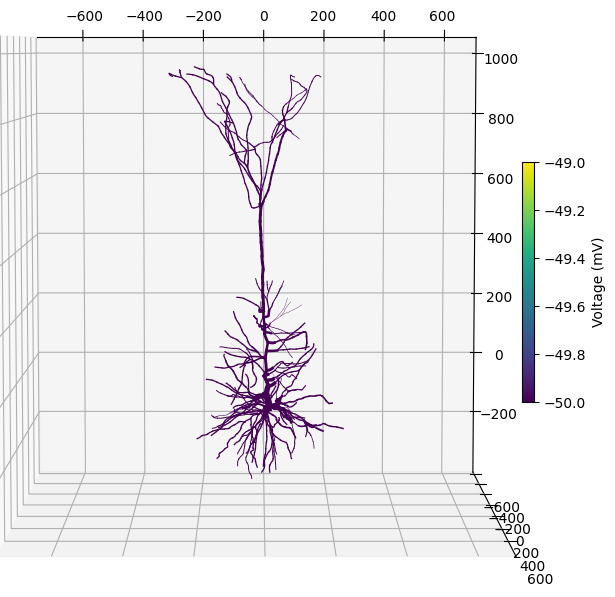

In [50]:
sim.analysis.plotShape(includePre=['L5_TTPC'], includePost=['L5_TTPC'], includeAxon=False, showSyns=True, showElectrodes=True,
    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-50, -49], showFig=1, synSize=2)